In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint

In [ ]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)

## Question 1 
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [ ]:
cancer = load_breast_cancer()
print(f'Base rate: {1 - np.mean(cancer.target):.5f}')

Base rate: 0.37258


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a) 
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


In [ ]:
def report_best(accuracies, param_range, p_label="", acc_label=""):
    best_accuracy = max(accuracies)
    print(f"Best {acc_label} accuracy: {best_accuracy:.5f}")
    best_parameter_settings = [param_range[i] for i in range(len(param_range)) 
                               if accuracies[i] == best_accuracy]
    print(f"Best {p_label} settings according to accuracy: {np.array(best_parameter_settings)}")
    

Best full_set accuracy: 1.00000
Best max_depth settings according to accuracy: [ 7  8  9 10]
Best cv accuracy: 0.92437
Best max_depth settings according to accuracy: [5]


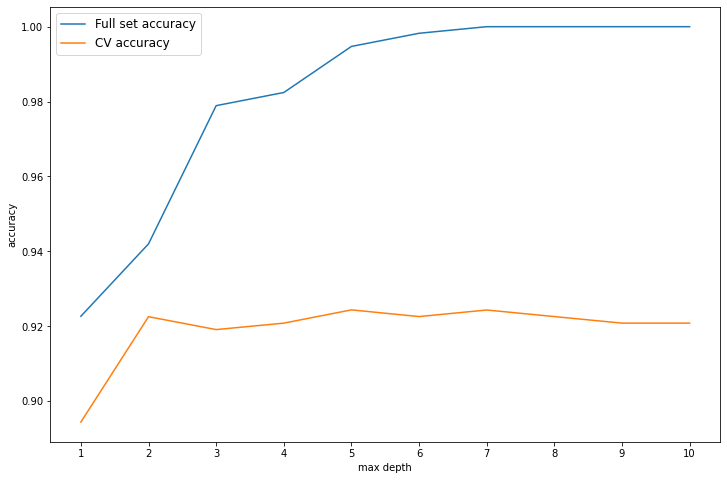

In [ ]:
# Experiment parameters
PARAM_RANGE = [i for i in range(1, 11)]
CLF_CLASS =  tree.DecisionTreeClassifier
CLF_ARGS = {"random_state":RANDOM_STATE}

full_set_accuracies = []
cv_accuracies = []
for max_depth in PARAM_RANGE:
#     clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)
    CLF_ARGS['max_depth'] = max_depth
    clf = CLF_CLASS(**CLF_ARGS)
    clf.fit(cancer.data, cancer.target)
    full_set_accuracies.append(clf.score(cancer.data, cancer.target))
    cv_accuracies.append(np.mean(cross_val_score(clf, cancer.data, cancer.target, cv=KFold(n_splits=10,
                                                                                    random_state=RANDOM_STATE,
                                                                                    shuffle=True))))


report_best(full_set_accuracies, PARAM_RANGE, p_label="max_depth", acc_label="full_set")
report_best(cv_accuracies, PARAM_RANGE, p_label="max_depth", acc_label="cv")
best_cv_accuracy = max(cv_accuracies)

plt.figure(figsize=FIGSIZE)
plt.plot(PARAM_RANGE, full_set_accuracies, label='Full set accuracy')
plt.plot(PARAM_RANGE, cv_accuracies, label='CV accuracy')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.xticks(PARAM_RANGE)
plt.legend(fontsize='large')
plt.show()

### (b) 
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** 7, 8, 9, 10

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** 5



## 3\. 
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a) 
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

Best  accuracy: 0.95420
Best n_estimators settings according to accuracy: [16]


<Figure size 432x288 with 0 Axes>

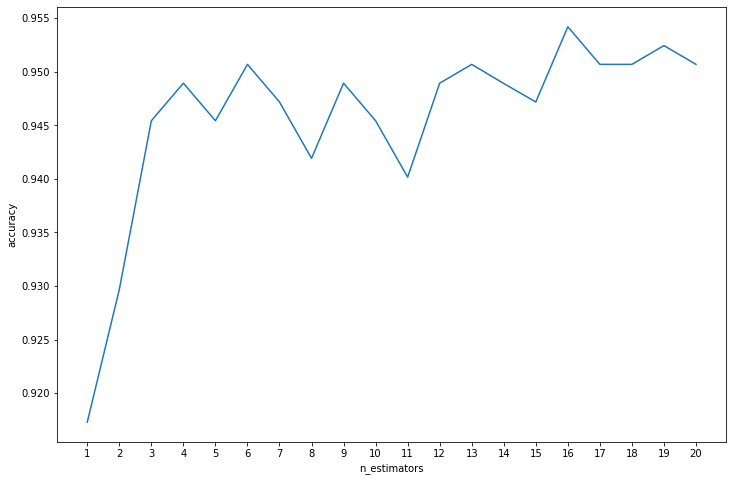

In [ ]:
# Experiment parameters
PARAM_RANGE = [i for i in range(1, 21)]
BEST_MAX_DEPTH = 5
CLF_CLASS = ensemble.RandomForestClassifier
CLF_ARGS = {"max_depth":BEST_MAX_DEPTH, "random_state":RANDOM_STATE}


plt.clf()
accuracies = []

for n_estimators in PARAM_RANGE:
    CLF_ARGS['n_estimators'] = n_estimators
    clf = CLF_CLASS(**CLF_ARGS)
    scores = cross_val_score(clf, cancer.data, cancer.target, cv=KFold(n_splits=10,
                                                                        random_state=RANDOM_STATE,
                                                                        shuffle=True))
    accuracies.append(np.mean(scores))

report_best(accuracies, PARAM_RANGE, p_label="n_estimators")
plt.figure(figsize=FIGSIZE)
plt.plot(PARAM_RANGE, accuracies)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(PARAM_RANGE)
plt.show()

### (b) 
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:** Yes

### (c) 
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here:** 16

### (d) 
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

Best  accuracy: 0.95771
Best max_depth settings according to accuracy: [6]


<Figure size 432x288 with 0 Axes>

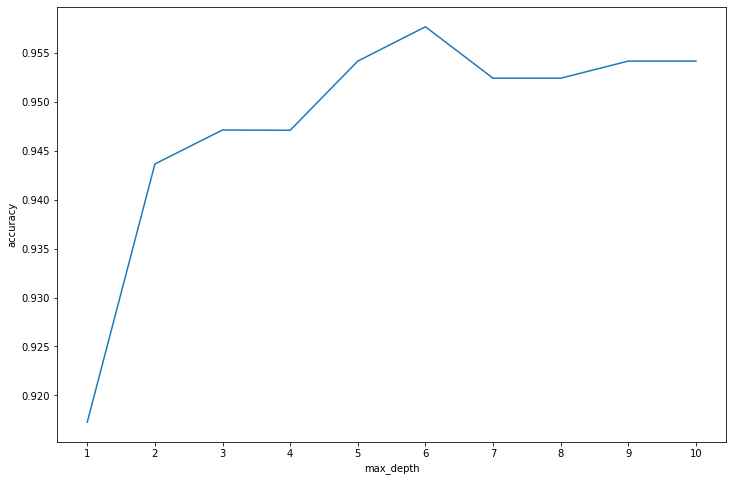

In [ ]:
# Experimental parameters
PARAM_RANGE = [i for i in range(1, 11)]
BEST_N_ESTIMATORS = 16
CLF_CLASS = ensemble.RandomForestClassifier
CLF_ARGS = {"n_estimators":BEST_N_ESTIMATORS, "random_state":RANDOM_STATE}

plt.clf()
accuracies = []
for max_depth in PARAM_RANGE:
#     clf = ensemble.RandomForestClassifier(n_estimators=BEST_N_ESTIMATORS, max_depth=max_depth
#                                           , random_state=RANDOM_STATE)
    CLF_ARGS['max_depth'] = max_depth
    clf = CLF_CLASS(**CLF_ARGS)
    scores = cross_val_score(clf, cancer.data, cancer.target, cv=KFold(n_splits=10,
                                                                        random_state=RANDOM_STATE,
                                                                        shuffle=True))
    accuracies.append(np.mean(scores))
    
report_best(accuracies, PARAM_RANGE, p_label="max_depth")
plt.figure(figsize=FIGSIZE)
plt.plot(PARAM_RANGE, accuracies)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(1,11))
plt.show()

### (e) 
In the plot in 3d, is the optimal setting of `max_depth` the same as before? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:** No. The best setting now is 6.


## 4\. 
For this last question, we will explore the dependability of our estimates.
### (a) 
Make a plot using the following procedure:
#### i. 
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii. 
Then record the best max depth settings for each random state.  Be sure to check whether multiple settings achieve the best accuracy.
#### iii. 
Plot the counts for the best max depth settings as a bar chart with the max depth
settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting). This will be the
sampling distribution of our ‘best parameter’ estimate.

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

<Figure size 432x288 with 0 Axes>

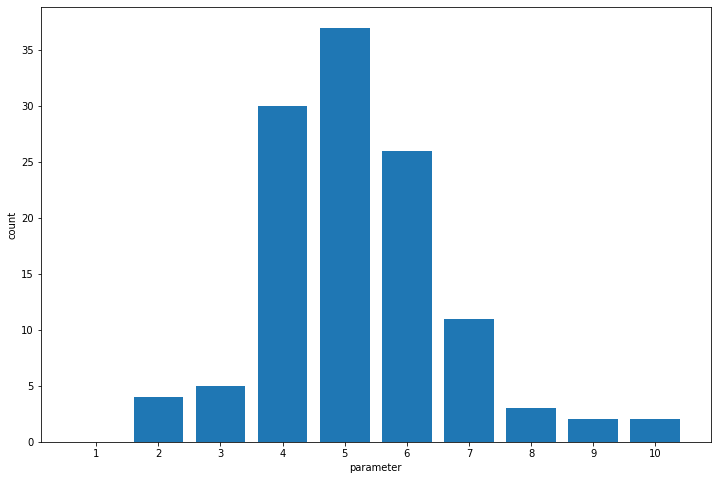

In [ ]:
# Experiment parameters
RS_RANGE = [i for i in range(100)]
PARAM_RANGE = [i for i in range(1,11)]
CLF_CLASS = tree.DecisionTreeClassifier
CLF_ARGS = {}

plt.clf()
best_param_counts = [0 for i in range(1,11)]
for i, random_state in enumerate(RS_RANGE):
    CLF_ARGS["random_state"] = random_state
    dev_accs_by_param = []
    for max_depth in PARAM_RANGE:
        CLF_ARGS["max_depth"] = max_depth
        clf = CLF_CLASS(**CLF_ARGS)
        cv_dev_scores = cross_val_score(clf, cancer.data, cancer.target, cv=KFold(n_splits=10,
                                                                            random_state=random_state,
                                                                            shuffle=True))
        dev_accs_by_param.append(np.mean(cv_dev_scores))

    best_acc = np.array(dev_accs_by_param).max()
    for j in range(len(PARAM_RANGE)):
        if dev_accs_by_param[j] == best_acc:
            best_param_counts[j] += 1
            
    print(f"{(i+1)/len(RS_RANGE):6.1%} completed\r", end="")
            
plt.figure(figsize=FIGSIZE)
plt.bar(PARAM_RANGE, best_param_counts)
plt.xlabel('parameter')
plt.ylabel('count')
plt.xticks(PARAM_RANGE)
plt.show()

### (b) 
What are the top two most frequent parameter settings?

**Student answer here:** 4 and 5
